# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

## Imports

In [46]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [47]:
from torch.utils.data import random_split, DataLoader                      

In [48]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])


# Create training set and define training dataloader
## YOUR CODE HERE ##

dataset = torchvision.datasets.MNIST(root='./data',
                                    train = True,
                                    download = True,
                                    transform = transform)

#print("Dataset size: ", len(dataset))
print(dataset)

# create three splits
# train, valid and test sets 
train_size = int(0.8*len(dataset))
valid_size = int(0.1*len(dataset))
test_size  = len(dataset) -( train_size + valid_size)

# split into three 
train_set, valid_set,test_set = random_split(dataset,
                                            [train_size,valid_size,test_size])


# Create test set and define test dataloader
# create the dataloaders

# define batch size 
BATCH_SIZE = 64

train_loader = DataLoader(train_set,
                          batch_size = BATCH_SIZE,
                          shuffle = True
                         )
valid_loader = DataLoader(valid_set,
                         batch_size = BATCH_SIZE,
                         shuffle = True)
test_loader  = DataLoader(test_set,
                         batch_size = BATCH_SIZE,
                         shuffle = True)
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(valid_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")



Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Training set size: 48000
Validation set size: 6000
Test set size: 6000


In [49]:
### Get a batch of the data

data_iter = iter(train_loader)
images,labels = next(data_iter)

# we have tensors of shape [64,1,28,28]
# 64 examples per batch, and images of 28x28
# while we have only one number per image (one for each of the 64 images)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

- `ToTensor()` transform is needed to obtain **tensors**.
  Pytorch use **tensors** while our dataset contains **images. 

- In order to make the training more efficient and easy for the optimizer
    we standardize the inputs.
   - after the transform our images will have a **mean** of 0.5
   and a **standard deviation** of 0.5
   

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [50]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


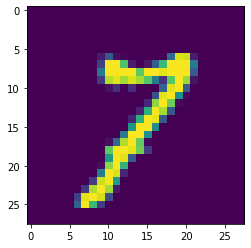

4


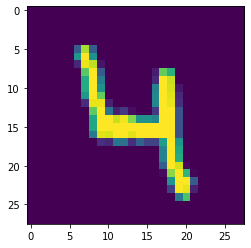

0


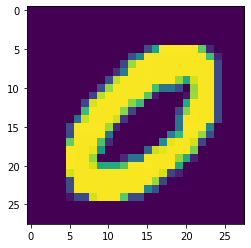

7


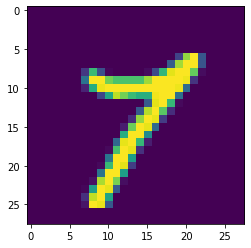

3


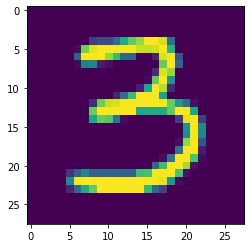

In [51]:
# Explore data
## YOUR CODE HERE ##

show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [52]:
## YOUR CODE HERE ##

# create a convolutional neural net
# Note: dimensions order in pytorch is 
# NCHW: N batch , C channels, H heigth, W width

class ConvNN(nn.Module):
    def __init__(self):
        super(ConvNN, self).__init__()
        
        # define layers
        self.conv1 = nn.Conv2d(
            in_channels   =1 , # pass images with one single channel (black and white)
            out_channels = 32, # return a tensor with 32 channels
            kernel_size =3,
            stride = 1, # a step of 1 while moving the kernel 
            padding = 1 # padding of 1 to fit kernel size 
            )
        
        # Batch normalization for conv1
        self.bn1 = nn.BatchNorm2d(32)  

        
        self.conv2 = nn.Conv2d(
            in_channels = 32, # the same as the output channels from previous layer ´conv1´ 
            out_channels = 64, # double the output channels 
            kernel_size = 3,
            stride = 1,
            padding = 1 
            ) 
        
        # Batch normalization for conv2
        self.bn2 = nn.BatchNorm2d(64)  
        
        self.conv3 = nn.Conv2d(
            in_channels=64, 
            out_channels=128, 
            kernel_size=3, 
            stride=1, 
            padding=1
        )
        self.bn3 = nn.BatchNorm2d(128)  # Batch normalization for conv3

        
        # Now define fully connected layers (multilayer perceptron)
        self.fc1 = nn.Linear(in_features = 128*3*3, # input is a tensor of 128*3*3 entries
                             out_features = 128)
        
        self.fc2 = nn.Linear(in_features = 128, # number input features is the same as output features from prev layer 
                             out_features = 10) # number of ouputs is the same as the number of classes (digits 0, 1, ... 10)
        
        #define dropout layer 
        self.dropout = nn.Dropout(0.5)
    
    
    def forward(self,x):
        
        # apply conv layer then activation function
        x = F.relu(self.conv1(x))
        # apply pooling reduction to get only regions of max activation
        x = F.max_pool2d(input = x, kernel_size = 2)
        
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        
        #print("x shape  after convs: ", x.shape)
        
        # from  tensor to a vector 
        x = x.view(-1,128 * 3 * 3) # batch size is first
        #print("x shape  after view: ", x.shape)
        
        # apply multi-layer perceptron
        x = F.relu(self.fc1(x))
        
        #apply dropout
        x = self.dropout(x)
        
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)  # Apply log_softmax


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [53]:
## YOUR CODE HERE ##

In [54]:
model = ConvNN()
model

ConvNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [63]:
# Loss for classification
criterion = nn.NLLLoss()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.03,#0.005
                             weight_decay = 0.001 #0.001
)

In [64]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [65]:
print("Moving model to device: ", device)
# move model to device 
model = model.to(device)
    

Moving model to device:  cuda


In [66]:
import time 
import torch as th 

In [67]:
def train_step(model: th.nn.Module,
          dataloader: th.utils.data.DataLoader,
          criterion: th.nn.Module,
          optimizer: th.optim.Optimizer,
          device: th.device) -> None:
    """
    Args:
        model: The model to train.
        train_dataloader: The training data.
        criterion: The loss function.
        optimizer: The optimizer to use.
        device: The device to use.
    Model weigths are changed in place
    
    Receive a model, train it with the given optimizer
    by ONE epoch, using the `criterion` function to measure the performance of the model.
    The model will be trained on the `train_dataloader` and
    evaluated on the `valid_dataloader` during each epoch.
    The function will return the trained model.

    Returns:
    loss_value, accuracy 
        
    """
    
    # set model to train mode 
    model.train()

    # init 
    loss_value,accuracy = 0,0
    
    #start time 
    t0 = time.time()
    n_batches= len(dataloader)
    
    #Iterate over the pairs (X_i,y_i) (features, labels)
    for i, (X,y) in enumerate(dataloader):
        #if i >= 10:
        #    break
        #print("Training on batch {} from {} batches".format(i,n_batches))

        #move the data to device
        #must be on the same device that model
        features,labels = X.to(device), y.to(device)
        
        # apply forward propagation
        # outputs is the log probabilities
        outputs = model(features)

        # compute loss
        loss= criterion(outputs, labels)

        # loss_value is a single number, get it with .item
        batch_loss = loss.item()
        loss_value +=  batch_loss

        # reset gradient accumulation
        # gradient tensors to 0
        optimizer.zero_grad()

        # compute gradients
        loss.backward()

        # update params. 
        # apply gradient descent
        optimizer.step()

        # Get the classes predicted by the model
        # logits -> classes 
        #predicted_classes = th.argmax(
        #    th.softmax(outputs,dim = 1),
        #    dim= 1 )
        
        # Compute accuracy applying exponential e^x
        # we are using Neative Log Likelihood Loss (th.nn.NLLLoss())
        # log probabilities -> probabilities
        probs = torch.exp(outputs)

        # get the topk biggest values from probs
        # values, indices = probs.topk(k=5, dim=1)  
        # we get (top probability, top class (index))
        top_p, top_class = probs.topk(k=1, dim=1)

        # compare the predicted class (top_class) and the actual
        #class (label)
        # transform (get a view) the labels into the shape of top class
        equals = top_class == labels.view(*top_class.shape)
        #train_accuracy += th.mean(equals.type(th.FloatTensor)).item()
        accuracy += th.mean(equals.type(th.float)).item()
        
    loss_value = loss_value / len(dataloader)
    
    accuracy = accuracy / len(dataloader)
    
    print('\033[102m' + 'New epoch completed!' + '\033[0m')
    print(f'Training Loss: {loss_value:.3f}')
    print(f'Training Accuracy: {100.0*accuracy:.3f}% ')
    print(f'Time Elapsed: {time.time() - t0:.3f} seconds')
    print()    

    return loss_value, accuracy

In [68]:
def validation_step(model: th.nn.Module,
          dataloader: th.utils.data.DataLoader,
          criterion: th.nn.Module,
          device: th.device) -> None:
    """
    Args:
        model: The model to train.
        train_dataloader: The training data.
        valid_dataloader: The validation data.
        criterion: The loss function.
        device: The device to use.
        
    Receive a model, run it  to validate on the given data.
    Use one epoch over the dataset on dataloader.
    The function will return accuracy and loss on the dataset
    
    
    Returns:
        loss_value, accuracy 
    """
    
    # set model to evaluation mode
    #turn off gradient computation
    model.eval()

    # init 
    loss_value,accuracy = 0,0
    
    #start time 
    t0 = time.time()

    #Iterate over the pairs (X_i,y_i) (features, labels)
    for i, (X,y) in enumerate(dataloader):
        #if i >= 10:
        #    break
        #move the data to device
        #must be on the same device that model
        features,labels = X.to(device),y.to(device)
        
        # apply forward propagation
        # outputs is the log probabilities
        outputs = model(features)

        # compute loss
        loss= criterion(outputs, labels)

        # the loss_value is a number
        batch_loss = loss.item()
        loss_value+=  batch_loss

        # Get the classes predicted by the model
        # logits -> classes 
        #predicted_classes = th.argmax(
        #    th.softmax(outputs,dim = 1),
        #    dim= 1 
        #)
        
        # Compute accuracy
        # log probabilities -> probabilities
        probs = torch.exp(outputs)

        # get the topk biggest values from probs
        # values, indices = probs.topk(k=5, dim=1)  
        # we get top probability, top class (index)
        top_p, top_class = probs.topk(k=1, dim=1)

        # compare the predicted class (top_class) and the actual classes (labels)
        # transform (get a view) the labels into the shape of top class
        equals = top_class == labels.view(*top_class.shape)
        #train_accuracy += th.mean(equals.type(th.FloatTensor)).item()
        accuracy += th.mean(equals.type(th.float)).item()
        
    loss_value = loss_value / len(dataloader)
    accuracy = accuracy / len(dataloader)

    print('\033[102m' + 'New validation epoch completed!' + '\033[0m')
    print(f'Validation Loss: {loss_value:.3f}')
    print(f'Validation Accuracy: {100.0*accuracy:.3f}%')
    print(f'Time Elapsed: {time.time() - t0:.3f} seconds')
    print()    

    return loss_value, accuracy 

In [69]:
def train(model: th.nn.Module,
          train_dataloader: th.utils.data.DataLoader,
          valid_dataloader: th.utils.data.DataLoader,
          criterion: th.nn.Module,
          optimizer: th.optim.Optimizer,
          device: th.device, 
          epochs : int) -> None:
    """
    Receive a model, train it with the given optimizer
    by n number of  epochs (epochs) , and evaluate it
    using the `criterion` function to measure the performance of the model.
    
    The model will be trained on the data given by `train_dataloader` and
    evaluated on the `valid_dataloader` data, during each epoch.
        
    Args:
        model: The model to train.
        train_dataloader: The training data.
        valid_dataloader: The validation data.
        criterion: The loss function.
        optimizer: The optimizer to use.
        device: The device to use.
        epochs: the number of epochs to train
    Model weigths are changed in place
    
    Returns:
    loss_value, accuracy 
        
    """

    # Collect loss and accuracy 
    train_losses, train_accuracies = [],[]
    valid_losses, valid_accuracies = [],[]

    print("\033[92m{}\033[00m".format("Starting training . . . ") )
    print("Number of epochs: " ,epochs)
    print("Device: ",device )
    print("Criterion: ", criterion)
    print("Optimizaer: ", optimizer)

    for epoch in range(epochs):
        print("\033[94m {}\033[00m".format("Epoch: " + str(epoch)))
    
        train_loss, train_accuracy = train_step(model = model ,
            dataloader = train_dataloader,
            criterion = criterion,
            optimizer = optimizer,
            device = device)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        valid_loss, valid_accuracy = validation_step(model = model ,
            dataloader = valid_dataloader,
            criterion = criterion,
            device = device)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_accuracy)

        print()
        
        
    #print("training losses and valid: ", train_losses,valid_losses)    
    # Plot the training and validation loss history
    plt.plot(train_losses, label="Training Loss")
    plt.plot(valid_losses, label="Validation Loss")
    plt.legend()
    
    plt.subplots(1)
    plt.plot(train_accuracies, label="Training Accuracy")
    plt.plot(valid_accuracies, label="Validation Accuracy")
    
    plt.legend()
    plt.show()

Starting training . . . 
Number of epochs:  10
Device:  cuda
Criterion:  NLLLoss()
Optimizaer:  Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.03
    maximize: False
    weight_decay: 0.001
)
 Epoch: 0
New epoch completed!
Training Loss: 0.374
Training Accuracy: 88.292% 
Time Elapsed: 12.286 seconds

New validation epoch completed!
Validation Loss: 11.081
Validation Accuracy: 23.061%
Time Elapsed: 1.340 seconds


 Epoch: 1
New epoch completed!
Training Loss: 0.240
Training Accuracy: 93.246% 
Time Elapsed: 11.560 seconds

New validation epoch completed!
Validation Loss: 0.278
Validation Accuracy: 91.700%
Time Elapsed: 1.318 seconds


 Epoch: 2
New epoch completed!
Training Loss: 0.243
Training Accuracy: 93.079% 
Time Elapsed: 11.481 seconds

New validation epoch completed!
Validation Loss: 0.193
Validation Accuracy: 94.038%
Time Elapsed: 1.367 seconds


 Epoch: 3
New epoch completed!
Training Loss: 0.236
Training Accuracy: 93.448% 
Time Elap

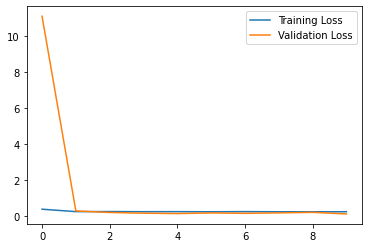

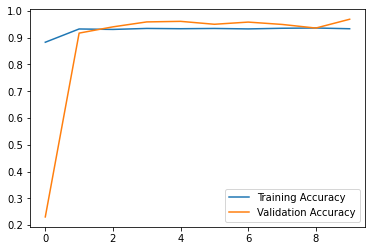

In [70]:
train(model,
        train_loader,
        valid_loader,
        criterion,
        optimizer,
        device, 
        epochs = 10)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [ ]:
## YOUR CODE HERE ##





Plot the training loss (and validation loss/accuracy, if recorded).

In [ ]:
## YOUR CODE HERE ##

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##